In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=28f9ab95cc818a97a25184eb44c377df


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | necochea
Processing Record 2 of Set 1 | korla
Processing Record 3 of Set 1 | marawi
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | luderitz
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | bengkulu
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | san vicente
Processing Record 13 of Set 1 | katsuura
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | ondjiva
Processing Record 16 of Set 1 | kaka
Processing Record 17 of Set 1 | severo-kurilsk
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | marcona
City not found. Skipping...
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | avarua
Processing Record 23 o

Processing Record 36 of Set 4 | berdigestyakh
Processing Record 37 of Set 4 | tessaoua
Processing Record 38 of Set 4 | bethel
Processing Record 39 of Set 4 | tateyama
Processing Record 40 of Set 4 | ambilobe
Processing Record 41 of Set 4 | portland
Processing Record 42 of Set 4 | ust-kamchatsk
City not found. Skipping...
Processing Record 43 of Set 4 | anadyr
Processing Record 44 of Set 4 | vao
Processing Record 45 of Set 4 | ramasukha
City not found. Skipping...
Processing Record 46 of Set 4 | acuna
City not found. Skipping...
Processing Record 47 of Set 4 | makurdi
Processing Record 48 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 49 of Set 4 | tsabong
Processing Record 50 of Set 4 | markova
Processing Record 1 of Set 5 | khandyga
Processing Record 2 of Set 5 | ossora
Processing Record 3 of Set 5 | lufilufi
Processing Record 4 of Set 5 | longyearbyen
Processing Record 5 of Set 5 | igarapava
Processing Record 6 of Set 5 | kamenskoye
City not found. Skipping...
Proce

Processing Record 28 of Set 8 | quatre cocos
Processing Record 29 of Set 8 | tamsweg
Processing Record 30 of Set 8 | adrar
Processing Record 31 of Set 8 | perth
Processing Record 32 of Set 8 | havelock
Processing Record 33 of Set 8 | maltahohe
Processing Record 34 of Set 8 | montego bay
Processing Record 35 of Set 8 | siderno
Processing Record 36 of Set 8 | benxi
Processing Record 37 of Set 8 | talnakh
Processing Record 38 of Set 8 | alice springs
Processing Record 39 of Set 8 | ketchikan
Processing Record 40 of Set 8 | cayenne
Processing Record 41 of Set 8 | juneau
Processing Record 42 of Set 8 | luyang
Processing Record 43 of Set 8 | vanino
Processing Record 44 of Set 8 | reforma
Processing Record 45 of Set 8 | teguise
Processing Record 46 of Set 8 | bereda
Processing Record 47 of Set 8 | claremore
Processing Record 48 of Set 8 | cabedelo
Processing Record 49 of Set 8 | falkoping
City not found. Skipping...
Processing Record 50 of Set 8 | pitimbu
Processing Record 1 of Set 9 | nizhne

Processing Record 14 of Set 12 | ciudad bolivar
Processing Record 15 of Set 12 | kenai
Processing Record 16 of Set 12 | altay
Processing Record 17 of Set 12 | giyani
Processing Record 18 of Set 12 | mosquera
Processing Record 19 of Set 12 | nokha
Processing Record 20 of Set 12 | nizhniy tagil-39
City not found. Skipping...
Processing Record 21 of Set 12 | shadrinsk
Processing Record 22 of Set 12 | lloydminster
Processing Record 23 of Set 12 | eureka
Processing Record 24 of Set 12 | piterka
Processing Record 25 of Set 12 | finnsnes
Processing Record 26 of Set 12 | kalabo
Processing Record 27 of Set 12 | rosarito
Processing Record 28 of Set 12 | sumy
Processing Record 29 of Set 12 | ouesso
Processing Record 30 of Set 12 | salamiyah
Processing Record 31 of Set 12 | itoman
Processing Record 32 of Set 12 | poya
Processing Record 33 of Set 12 | pemba
Processing Record 34 of Set 12 | bathsheba
Processing Record 35 of Set 12 | tabuk
Processing Record 36 of Set 12 | kemin
Processing Record 37 o

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Necochea,-38.5473,-58.7368,46.04,72,100,11.83,AR,2021-06-03 03:32:46
1,Korla,41.7597,86.1469,87.19,14,3,5.41,CN,2021-06-03 03:25:17
2,Marawi,7.9986,124.2928,83.48,57,100,1.63,PH,2021-06-03 03:25:07
3,Butaritari,3.0707,172.7902,82.33,78,100,12.30,KI,2021-06-03 03:24:25
4,Qaanaaq,77.4840,-69.3632,24.26,88,100,4.59,GL,2021-06-03 03:24:31
5,Albany,42.6001,-73.9662,63.03,94,100,4.45,US,2021-06-03 03:32:46
6,Luderitz,-26.6481,15.1594,65.61,28,4,24.45,NA,2021-06-03 03:26:12
7,Hobart,-42.8794,147.3294,58.91,66,75,1.99,AU,2021-06-03 03:20:20
8,Bengkulu,-3.8004,102.2655,85.64,62,69,2.42,ID,2021-06-03 03:24:31
9,Bluff,-46.6000,168.3333,49.80,78,77,6.33,NZ,2021-06-03 03:24:33


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Necochea,AR,2021-06-03 03:32:46,-38.5473,-58.7368,46.04,72,100,11.83
1,Korla,CN,2021-06-03 03:25:17,41.7597,86.1469,87.19,14,3,5.41
2,Marawi,PH,2021-06-03 03:25:07,7.9986,124.2928,83.48,57,100,1.63
3,Butaritari,KI,2021-06-03 03:24:25,3.0707,172.7902,82.33,78,100,12.30
4,Qaanaaq,GL,2021-06-03 03:24:31,77.4840,-69.3632,24.26,88,100,4.59
5,Albany,US,2021-06-03 03:32:46,42.6001,-73.9662,63.03,94,100,4.45
6,Luderitz,NA,2021-06-03 03:26:12,-26.6481,15.1594,65.61,28,4,24.45
7,Hobart,AU,2021-06-03 03:20:20,-42.8794,147.3294,58.91,66,75,1.99
8,Bengkulu,ID,2021-06-03 03:24:31,-3.8004,102.2655,85.64,62,69,2.42
9,Bluff,NZ,2021-06-03 03:24:33,-46.6000,168.3333,49.80,78,77,6.33


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

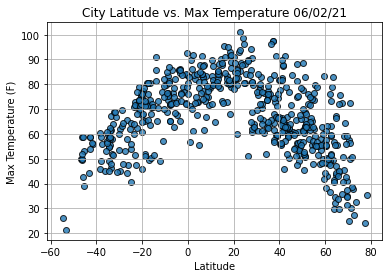

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

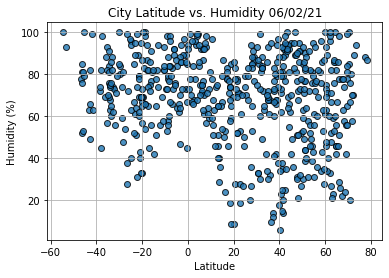

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

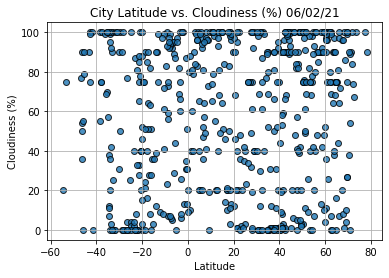

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

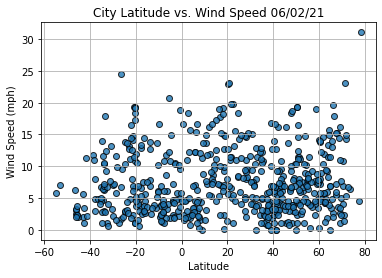

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Korla,CN,2021-06-03 03:25:17,41.7597,86.1469,87.19,14,3,5.41
2,Marawi,PH,2021-06-03 03:25:07,7.9986,124.2928,83.48,57,100,1.63
3,Butaritari,KI,2021-06-03 03:24:25,3.0707,172.7902,82.33,78,100,12.30
4,Qaanaaq,GL,2021-06-03 03:24:31,77.4840,-69.3632,24.26,88,100,4.59
5,Albany,US,2021-06-03 03:32:46,42.6001,-73.9662,63.03,94,100,4.45


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

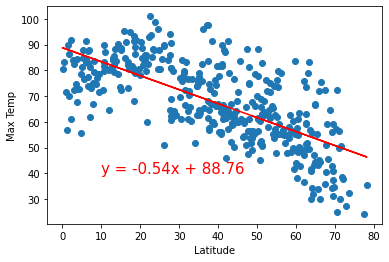

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

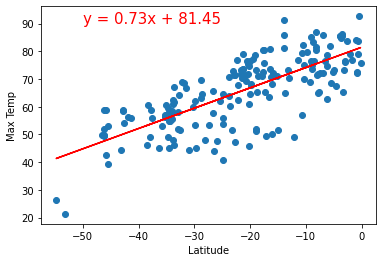

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

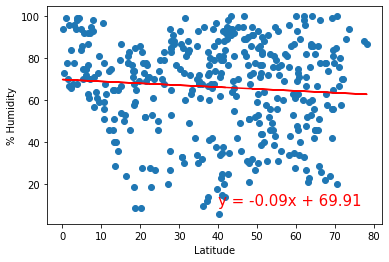

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

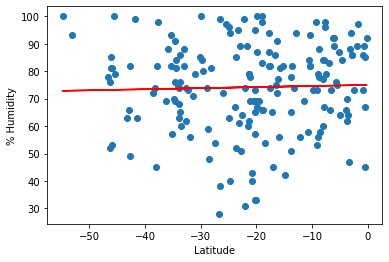

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

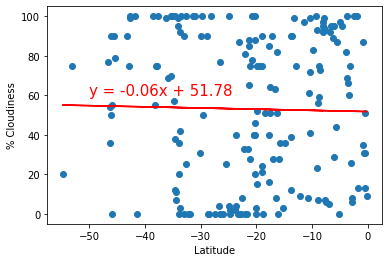

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

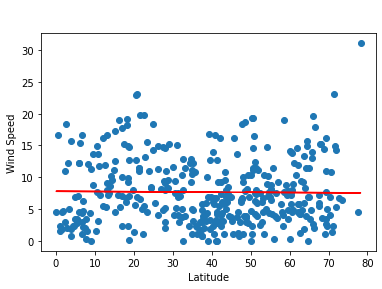

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

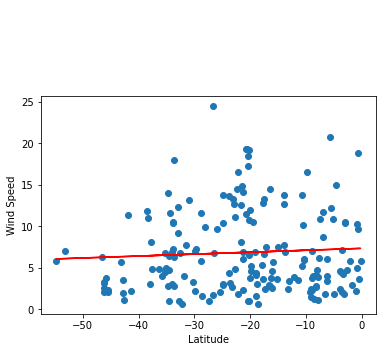

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))